In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from numpy import genfromtxt
from sklearn.metrics import mean_squared_error 
plt.style.use(['fivethirtyeight'])

In [56]:
def RidgeRegression(y,X,alpha,tol, lambdaa):
    N = len(X[:,1]) #number of items 
    par = len(X[1,:]) #number of parameters 
    beta = np.zeros(par)
    beta.shape = (len(beta),1)
    err = 1.0
    iteration = 1
    ridge = lambda X,y, lambdaa: np.dot((np.dot(X,beta)-y).T,np.dot(X,beta)-y)+lambdaa*np.dot(beta.T,beta)
    while err > tol:
        value = ridge(X,y,lambdaa)
        gradient = 2*((np.dot((np.dot(X,beta)-y).T, X)).T +lambdaa*beta)
        beta = beta - alpha/N*gradient
        err = abs(value - ridge(X,y, lambdaa))
        iteration = iteration+1
    return beta


In [11]:
#Load data 
X = genfromtxt('X.csv', delimiter=',')
y = genfromtxt('y.csv', delimiter=',')
y.shape = (len(y),1) # explicitly setting y to columg vector 

In [13]:
#Hold-out cross validation 
XTrain = X[:70,:]
yTrain = y[:70]
XTest = X[70:, :]
yTest = y[70:]

Text(0, 0.5, 'Test error (MSE)')

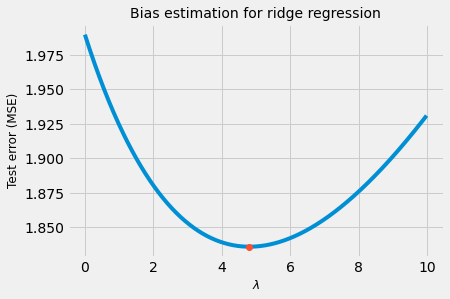

In [87]:
#Ridge Regression 
mse = []
L = []
lambdaa = np.arange(0,10,0.01)
for i in lambdaa: 
    beta = RidgeRegression(yTrain, XTrain, 0.01, 1e-9, i)
    yHat = np.dot(XTest,beta)
    mse.append(mean_squared_error(yHat, yTest))
    L.append(i)

#Plotting the result
fig = plt.figure()
ax = plt.axes()
ax.plot(L, mse)
ax.plot(L[mse.index(min(mse))], mse[mse.index(min(mse))], 'o')
ax.set_title('Bias estimation for ridge regression', fontsize = 14)
ax.set_xlabel(r'$\lambda$', fontsize = 12)
ax.set_ylabel('Test error (MSE)', fontsize = 12)

